In [1]:
# Import necessary library

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scs
import joblib
import yaml
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import kendalltau
from scipy.stats import chi2_contingency

In [2]:
def load_parameter(parameter_direction):
    with open(parameter_direction,'r') as file:
        params = yaml.safe_load(file)
    
    return params

In [3]:
params = load_parameter("config/configuration_file_1.yaml")

In [4]:
params

{'data_direction': 'raw_data/indeks-standar-pencemar-udara-di-spku-bulan-juni-sampai-desember-tahun-2021.xlsx',
 'datetime_columns': ['tanggal'],
 'int32_columns': ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'max'],
 'label': 'categori',
 'label_categories': ['BAIK', 'TIDAK SEHAT'],
 'object_columns': ['stasiun', 'critical', 'categori'],
 'predictors': ['stasiun', 'pm10', 'pm25', 'so2', 'co', 'o3', 'no2'],
 'range_co': [-1, 100],
 'range_no2': [-1, 100],
 'range_o3': [-1, 160],
 'range_pm10': [-1, 800],
 'range_pm25': [-1, 400],
 'range_so2': [-1, 500],
 'range_stasiun': ['DKI1 (Bunderan HI)',
  'DKI2 (Kelapa Gading)',
  'DKI3 (Jagakarsa)',
  'DKI4 (Lubang Buaya)',
  'DKI5 (Kebon Jeruk) Jakarta Barat']}

# Data Pre-processing

In [5]:
X_train = joblib.load("processed/X_train.pkl")
y_train = joblib.load("processed/y_train.pkl")

X_valid = joblib.load("processed/X_valid.pkl")
y_valid = joblib.load("processed/y_valid.pkl")

X_test = joblib.load("processed/X_test.pkl")
y_test = joblib.load("processed/y_test.pkl")

In [6]:
# Combining data
train_set = pd.concat([X_train, y_train], axis = 1)
validation_set = pd.concat([X_valid, y_valid], axis = 1)
testing_set = pd.concat([X_test, y_test], axis = 1)

**1. Recategorised label**

Train set

In [7]:
# Check data proportion
train_set[params['label']].value_counts()

SEDANG         514
TIDAK SEHAT    134
BAIK            41
Name: categori, dtype: int64

In [8]:
# Replace value function
def replace_value(data, column, column_number, old_value, replace_value):
    
    """
    This function is to locate and replace value from a column. 
    
    :param data: <pandas dataframe> data contain sample
    :param column: <string> column name
    :param column_number: <string> single or multiple column
    :param old_value: <string/int/float> old value or current value
    :param replace_value: <string/int/float> value to replace old value
    :return data: <pandas dataframe> data contain sample
    """
    
    if str(column_number).lower() == "multiple":
        for col in column:
            data[col] = data[col].replace(old_value, replace_value)
    elif str(column_number).lower() == "single":
        data[column] = data[column].replace(old_value, replace_value)
        
    else: 
        "column_number is not correct"
        
    return data

In [9]:
# Replace value
replace_value(train_set, params['label'], 'single', 'SEDANG', "TIDAK SEHAT")

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
499,2021-09-10,DKI2 (Kelapa Gading),58,77,53,9,32,20,77,PM25,TIDAK SEHAT
472,2021-09-13,DKI1 (Bunderan HI),51,64,29,8,23,21,64,PM25,TIDAK SEHAT
857,2021-11-03,DKI4 (Lubang Buaya),51,83,42,12,73,17,83,PM25,TIDAK SEHAT
79,2021-06-20,DKI3 (Jagakarsa),80,111,52,7,24,29,111,PM25,TIDAK SEHAT
545,2021-09-26,DKI3 (Jagakarsa),54,74,50,10,27,13,74,PM25,TIDAK SEHAT
...,...,...,...,...,...,...,...,...,...,...,...
452,2021-08-24,DKI5 (Kebon Jeruk) Jakarta Barat,60,97,31,7,32,12,97,PM25,TIDAK SEHAT
556,2021-09-07,DKI4 (Lubang Buaya),56,86,42,8,21,21,86,PM25,TIDAK SEHAT
162,2021-07-13,DKI1 (Bunderan HI),63,89,33,10,18,24,89,PM25,TIDAK SEHAT
439,2021-08-11,DKI5 (Kebon Jeruk) Jakarta Barat,54,92,29,11,25,25,92,PM25,TIDAK SEHAT


In [10]:
# Check data proportion
train_set[params['label']].value_counts()

TIDAK SEHAT    648
BAIK            41
Name: categori, dtype: int64

Valid set

In [11]:
# Check data proportion
validation_set[params['label']].value_counts()

SEDANG         138
TIDAK SEHAT     37
BAIK            11
Name: categori, dtype: int64

In [12]:
# Replace value
replace_value(validation_set, params['label'], 'single', 'SEDANG', "TIDAK SEHAT")

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
967,2021-12-22,DKI2 (Kelapa Gading),65,94,36,21,54,49,94,PM25,TIDAK SEHAT
408,2021-08-11,DKI4 (Lubang Buaya),56,102,39,11,27,23,102,PM25,TIDAK SEHAT
789,2021-11-25,DKI1 (Bunderan HI),39,57,34,10,11,7,57,PM25,TIDAK SEHAT
604,2021-09-25,DKI5 (Kebon Jeruk) Jakarta Barat,45,64,-1,4,24,12,64,PM25,TIDAK SEHAT
921,2021-12-07,DKI1 (Bunderan HI),30,31,34,12,16,9,34,SO2,BAIK
...,...,...,...,...,...,...,...,...,...,...,...
65,2021-06-06,DKI3 (Jagakarsa),63,95,45,11,26,19,95,PM25,TIDAK SEHAT
1028,2021-12-21,DKI4 (Lubang Buaya),62,-1,42,17,13,27,62,PM10,TIDAK SEHAT
844,2021-11-20,DKI3 (Jagakarsa),37,53,43,6,31,8,53,PM25,TIDAK SEHAT
453,2021-08-25,DKI5 (Kebon Jeruk) Jakarta Barat,63,95,31,10,29,20,95,PM25,TIDAK SEHAT


In [13]:
# Check data proportion
validation_set[params['label']].value_counts()

TIDAK SEHAT    175
BAIK            11
Name: categori, dtype: int64

Test set

In [14]:
# Check data proportion
testing_set[params['label']].value_counts()

SEDANG         139
TIDAK SEHAT     36
BAIK            11
Name: categori, dtype: int64

In [15]:
# Replace value
replace_value(testing_set, params['label'], 'single', 'SEDANG', "TIDAK SEHAT")

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
168,2021-07-19,DKI1 (Bunderan HI),66,95,26,10,32,28,95,PM25,TIDAK SEHAT
622,2021-10-13,DKI1 (Bunderan HI),52,67,28,8,25,31,67,PM25,TIDAK SEHAT
621,2021-10-12,DKI1 (Bunderan HI),56,76,37,9,23,35,76,PM25,TIDAK SEHAT
176,2021-07-27,DKI1 (Bunderan HI),61,91,29,10,23,28,91,PM25,TIDAK SEHAT
668,2021-10-28,DKI2 (Kelapa Gading),51,70,67,12,49,30,70,PM25,TIDAK SEHAT
...,...,...,...,...,...,...,...,...,...,...,...
420,2021-08-23,DKI4 (Lubang Buaya),63,106,40,10,24,20,106,PM25,TIDAK SEHAT
697,2021-10-26,DKI3 (Jagakarsa),51,71,51,13,30,15,71,PM25,TIDAK SEHAT
480,2021-09-21,DKI1 (Bunderan HI),55,81,28,11,29,36,81,PM25,TIDAK SEHAT
12,2021-06-13,DKI1 (Bunderan HI),51,70,23,14,25,25,70,PM25,TIDAK SEHAT


In [16]:
# Check data proportion
testing_set[params['label']].value_counts()

TIDAK SEHAT    175
BAIK            11
Name: categori, dtype: int64

**2. Handling missing value**

In [17]:
# Checking replaced value
for col in params['int32_columns']:
    print(len(train_set[train_set[col] == -1]))

15
13
56
2
15
1
0


In [18]:
# Replace value
replace_value(data = train_set, 
              column = train_set.columns,
              column_number = "multiple",
              old_value = -1,
              replace_value = np.nan)

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
499,2021-09-10,DKI2 (Kelapa Gading),58.0,77.0,53.0,9.0,32.0,20.0,77,PM25,TIDAK SEHAT
472,2021-09-13,DKI1 (Bunderan HI),51.0,64.0,29.0,8.0,23.0,21.0,64,PM25,TIDAK SEHAT
857,2021-11-03,DKI4 (Lubang Buaya),51.0,83.0,42.0,12.0,73.0,17.0,83,PM25,TIDAK SEHAT
79,2021-06-20,DKI3 (Jagakarsa),80.0,111.0,52.0,7.0,24.0,29.0,111,PM25,TIDAK SEHAT
545,2021-09-26,DKI3 (Jagakarsa),54.0,74.0,50.0,10.0,27.0,13.0,74,PM25,TIDAK SEHAT
...,...,...,...,...,...,...,...,...,...,...,...
452,2021-08-24,DKI5 (Kebon Jeruk) Jakarta Barat,60.0,97.0,31.0,7.0,32.0,12.0,97,PM25,TIDAK SEHAT
556,2021-09-07,DKI4 (Lubang Buaya),56.0,86.0,42.0,8.0,21.0,21.0,86,PM25,TIDAK SEHAT
162,2021-07-13,DKI1 (Bunderan HI),63.0,89.0,33.0,10.0,18.0,24.0,89,PM25,TIDAK SEHAT
439,2021-08-11,DKI5 (Kebon Jeruk) Jakarta Barat,54.0,92.0,29.0,11.0,25.0,25.0,92,PM25,TIDAK SEHAT


In [19]:
# Sanity check
train_set.isna().sum()

tanggal      0
stasiun      0
pm10        15
pm25        13
so2         56
co           2
o3          15
no2          1
max          0
critical     0
categori     0
dtype: int64

In [20]:
# Checking replaced value
for col in params['int32_columns']:
    print(len(validation_set[validation_set[col] == -1]))

4
4
17
3
7
3
0


In [21]:
# Replace value
replace_value(data = validation_set, 
              column = validation_set.columns,
              column_number = "multiple",
              old_value = -1,
              replace_value = np.nan)

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
967,2021-12-22,DKI2 (Kelapa Gading),65.0,94.0,36.0,21.0,54.0,49.0,94,PM25,TIDAK SEHAT
408,2021-08-11,DKI4 (Lubang Buaya),56.0,102.0,39.0,11.0,27.0,23.0,102,PM25,TIDAK SEHAT
789,2021-11-25,DKI1 (Bunderan HI),39.0,57.0,34.0,10.0,11.0,7.0,57,PM25,TIDAK SEHAT
604,2021-09-25,DKI5 (Kebon Jeruk) Jakarta Barat,45.0,64.0,NaN,4.0,24.0,12.0,64,PM25,TIDAK SEHAT
921,2021-12-07,DKI1 (Bunderan HI),30.0,31.0,34.0,12.0,16.0,9.0,34,SO2,BAIK
...,...,...,...,...,...,...,...,...,...,...,...
65,2021-06-06,DKI3 (Jagakarsa),63.0,95.0,45.0,11.0,26.0,19.0,95,PM25,TIDAK SEHAT
1028,2021-12-21,DKI4 (Lubang Buaya),62.0,NaN,42.0,17.0,13.0,27.0,62,PM10,TIDAK SEHAT
844,2021-11-20,DKI3 (Jagakarsa),37.0,53.0,43.0,6.0,31.0,8.0,53,PM25,TIDAK SEHAT
453,2021-08-25,DKI5 (Kebon Jeruk) Jakarta Barat,63.0,95.0,31.0,10.0,29.0,20.0,95,PM25,TIDAK SEHAT


In [22]:
# Sanity check
validation_set.isna().sum()

tanggal      0
stasiun      0
pm10         4
pm25         4
so2         17
co           3
o3           7
no2          3
max          0
critical     0
categori     0
dtype: int64

In [23]:
# Checking replaced value
for col in params['int32_columns']:
    print(len(testing_set[testing_set[col] == -1]))

6
3
15
2
6
1
0


In [24]:
# Replace value
replace_value(data = testing_set, 
              column = testing_set.columns,
              column_number = "multiple",
              old_value = -1,
              replace_value = np.nan)

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
168,2021-07-19,DKI1 (Bunderan HI),66.0,95.0,26.0,10.0,32.0,28.0,95,PM25,TIDAK SEHAT
622,2021-10-13,DKI1 (Bunderan HI),52.0,67.0,28.0,8.0,25.0,31.0,67,PM25,TIDAK SEHAT
621,2021-10-12,DKI1 (Bunderan HI),56.0,76.0,37.0,9.0,23.0,35.0,76,PM25,TIDAK SEHAT
176,2021-07-27,DKI1 (Bunderan HI),61.0,91.0,29.0,10.0,23.0,28.0,91,PM25,TIDAK SEHAT
668,2021-10-28,DKI2 (Kelapa Gading),51.0,70.0,67.0,12.0,49.0,30.0,70,PM25,TIDAK SEHAT
...,...,...,...,...,...,...,...,...,...,...,...
420,2021-08-23,DKI4 (Lubang Buaya),63.0,106.0,40.0,10.0,24.0,20.0,106,PM25,TIDAK SEHAT
697,2021-10-26,DKI3 (Jagakarsa),51.0,71.0,51.0,13.0,30.0,15.0,71,PM25,TIDAK SEHAT
480,2021-09-21,DKI1 (Bunderan HI),55.0,81.0,28.0,11.0,29.0,36.0,81,PM25,TIDAK SEHAT
12,2021-06-13,DKI1 (Bunderan HI),51.0,70.0,23.0,14.0,25.0,25.0,70,PM25,TIDAK SEHAT


In [25]:
# Sanity check
testing_set.isna().sum()

tanggal      0
stasiun      0
pm10         6
pm25         3
so2         15
co           2
o3           6
no2          1
max          0
critical     0
categori     0
dtype: int64

- pm10      : median dari kelas 0 dan 1 terpaut cukup jauh, maka akan menggunakan kelas

In [26]:
# Calculate median
imputation_baik = int(train_set[train_set[params['label']] == params['label_categories'][0]].pm10.median())
imputation_tidak_sehat = int(train_set[train_set[params['label']] == params['label_categories'][1]].pm10.median())

In [27]:
# Show mean
imputation_baik, imputation_tidak_sehat

(28, 57)

1. Train set

In [28]:
# Checking mising value proportion
train_set[train_set[params['label']] == params['label_categories'][0]].pm10.isnull().sum(), train_set[train_set[params['label']] == params['label_categories'][1]].pm10.isnull().sum()

(1, 14)

In [29]:
# Missing value imputation
train_set.loc[train_set[(train_set[params['label']] == params['label_categories'][0]) & (train_set['pm10'].isnull() == True)].index, "pm10"] = imputation_baik
train_set.loc[train_set[(train_set[params['label']] == params['label_categories'][1]) & (train_set['pm10'].isnull() == True)].index, "pm10"] = imputation_tidak_sehat

In [30]:
# Checking mising value proportion
train_set[train_set[params['label']] == params['label_categories'][0]].pm10.isnull().sum(), train_set[train_set[params['label']] == params['label_categories'][1]].pm10.isnull().sum()

(0, 0)

2. Validation set

In [31]:
# Checking mising value proportion
validation_set[validation_set[params['label']] == params['label_categories'][0]].pm10.isnull().sum(), validation_set[validation_set[params['label']] == params['label_categories'][1]].pm10.isnull().sum()

(0, 4)

In [32]:
# Missing value imputation
validation_set.loc[validation_set[(validation_set[params['label']] == params['label_categories'][0]) & (validation_set['pm10'].isnull() == True)].index, "pm10"] = imputation_baik
validation_set.loc[validation_set[(validation_set[params['label']] == params['label_categories'][1]) & (validation_set['pm10'].isnull() == True)].index, "pm10"] = imputation_tidak_sehat

In [33]:
# Checking mising value proportion
validation_set[validation_set[params['label']] == params['label_categories'][0]].pm10.isnull().sum(), validation_set[validation_set[params['label']] == params['label_categories'][1]].pm10.isnull().sum()

(0, 0)

3. Test set

In [34]:
# Checking mising value proportion
testing_set[testing_set[params['label']] == params['label_categories'][0]].pm10.isnull().sum(), testing_set[testing_set[params['label']] == params['label_categories'][1]].pm10.isnull().sum()

(0, 6)

In [35]:
# Missing value imputation
testing_set.loc[testing_set[(testing_set[params['label']] == params['label_categories'][0]) & (testing_set['pm10'].isnull() == True)].index, "pm10"] = imputation_baik
testing_set.loc[testing_set[(testing_set[params['label']] == params['label_categories'][1]) & (testing_set['pm10'].isnull() == True)].index, "pm10"] = imputation_tidak_sehat

In [36]:
# Checking mising value proportion
testing_set[testing_set[params['label']] == params['label_categories'][0]].pm10.isnull().sum(), testing_set[testing_set[params['label']] == params['label_categories'][1]].pm10.isnull().sum()

(0, 0)

- pm25      : mean dari kelas 0 dan 1 terpaut cukup jauh, maka akan menggunakan kelas

In [37]:
# Calculate mean
imputation_baik = int(train_set[train_set[params['label']] == params['label_categories'][0]].pm25.mean())
imputation_tidak_sehat = int(train_set[train_set[params['label']] == params['label_categories'][1]].pm25.mean())

In [38]:
# Show mean
imputation_baik, imputation_tidak_sehat

(40, 85)

1. Train set

In [39]:
# Checking mising value proportion
train_set[train_set[params['label']] == params['label_categories'][0]].pm25.isnull().sum(), train_set[train_set[params['label']] == params['label_categories'][1]].pm25.isnull().sum()

(8, 5)

In [40]:
# Missing value imputation
train_set.loc[train_set[(train_set[params['label']] == params['label_categories'][0]) & (train_set['pm25'].isnull() == True)].index, "pm25"] = imputation_baik
train_set.loc[train_set[(train_set[params['label']] == params['label_categories'][1]) & (train_set['pm25'].isnull() == True)].index, "pm25"] = imputation_tidak_sehat

In [41]:
# Checking mising value proportion
train_set[train_set[params['label']] == params['label_categories'][0]].pm25.isnull().sum(), train_set[train_set[params['label']] == params['label_categories'][1]].pm25.isnull().sum()

(0, 0)

2. Validation set

In [42]:
# Checking mising value proportion
validation_set[validation_set[params['label']] == params['label_categories'][0]].pm25.isnull().sum(), validation_set[validation_set[params['label']] == params['label_categories'][1]].pm25.isnull().sum()

(0, 4)

In [43]:
# Missing value imputation
validation_set.loc[validation_set[(validation_set[params['label']] == params['label_categories'][0]) & (validation_set['pm25'].isnull() == True)].index, "pm25"] = imputation_baik
validation_set.loc[validation_set[(validation_set[params['label']] == params['label_categories'][1]) & (validation_set['pm25'].isnull() == True)].index, "pm25"] = imputation_tidak_sehat

In [44]:
# Checking mising value proportion
validation_set[validation_set[params['label']] == params['label_categories'][0]].pm25.isnull().sum(), validation_set[validation_set[params['label']] == params['label_categories'][1]].pm25.isnull().sum()

(0, 0)

3. Test set

In [45]:
# Checking mising value proportion
testing_set[testing_set[params['label']] == params['label_categories'][0]].pm25.isnull().sum(), testing_set[testing_set[params['label']] == params['label_categories'][1]].pm25.isnull().sum()

(1, 2)

In [46]:
# Missing value imputation
testing_set.loc[testing_set[(testing_set[params['label']] == params['label_categories'][0]) & (testing_set['pm25'].isnull() == True)].index, "pm25"] = imputation_baik
testing_set.loc[testing_set[(testing_set[params['label']] == params['label_categories'][1]) & (testing_set['pm25'].isnull() == True)].index, "pm25"] = imputation_tidak_sehat

In [47]:
# Checking mising value proportion
testing_set[testing_set[params['label']] == params['label_categories'][0]].pm25.isnull().sum(), testing_set[testing_set[params['label']] == params['label_categories'][1]].pm25.isnull().sum()

(0, 0)

- so2       : mean dari kelas 0 dan 1 tidak terpaut cukup jauh, maka tidak akan menggunakan kelas
- co        : median dari kelas 0 dan 1 tidak terpaut jauh, maka tidak akan menggunakan kelas
- o3        : median dari kelas 0 dan 1 tidak terpaut cukup jauh, maka tidak akan menggunakan kelas
- no2       : median dari kelas 0 dan 1 tidak terpaut cukup jauh, maka tidak akan menggunakan kelas

In [48]:
# Calculate mean and median
imputation_so2 = int(train_set['so2'].mean())
imputation_co = int(train_set['co'].median())
imputation_o3 = int(train_set['o3'].median())
imputation_no2 = int(train_set['no2'].median())

In [49]:
# Store into dictionary
imputation_values = {"so2" : imputation_so2, "co" : imputation_co, "o3" : imputation_o3, "no2" : imputation_no2}

In [50]:
# Show dictionary
imputation_values

{'so2': 39, 'co': 11, 'o3': 28, 'no2': 20}

In [51]:
# Handling missing value

# Train set
train_set.fillna(value = imputation_values, inplace = True)

# Validation set
validation_set.fillna(value = imputation_values, inplace = True)

# Test set
testing_set.fillna(value = imputation_values, inplace = True)

In [52]:
print(f"Train set \n{train_set.isna().sum()}, \n------------- \nValidation set \n{validation_set.isna().sum()}, \n------------- \nTest set \n{testing_set.isna().sum()}")

Train set 
tanggal     0
stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
categori    0
dtype: int64, 
------------- 
Validation set 
tanggal     0
stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
categori    0
dtype: int64, 
------------- 
Test set 
tanggal     0
stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
categori    0
dtype: int64


**3. Encoding feature**

One Hot Encoding

In [53]:
# Check proportion of stasiun
train_set['stasiun'].value_counts()

DKI5 (Kebon Jeruk) Jakarta Barat    143
DKI1 (Bunderan HI)                  139
DKI3 (Jagakarsa)                    137
DKI2 (Kelapa Gading)                136
DKI4 (Lubang Buaya)                 134
Name: stasiun, dtype: int64

In [54]:
# Check proportion of stasiun
testing_set['stasiun'].value_counts()

DKI1 (Bunderan HI)                  47
DKI2 (Kelapa Gading)                39
DKI3 (Jagakarsa)                    37
DKI4 (Lubang Buaya)                 36
DKI5 (Kebon Jeruk) Jakarta Barat    27
Name: stasiun, dtype: int64

In [55]:
# Check proportion of stasiun
validation_set['stasiun'].value_counts()

DKI5 (Kebon Jeruk) Jakarta Barat    44
DKI3 (Jagakarsa)                    39
DKI2 (Kelapa Gading)                38
DKI4 (Lubang Buaya)                 37
DKI1 (Bunderan HI)                  28
Name: stasiun, dtype: int64

Note that all of the sets contain five of the stasiun, then we can proceed with the One Hot Encoding without having to reduce one unique value within stasiun column.

In [56]:
# Sanity check
print(train_set.shape, validation_set.shape, testing_set.shape)

(689, 11) (186, 11) (186, 11)


In [57]:
# Input output split
# X_train, y_train = input_output_split(df = train_set, column = params['label'])
# X_valid, y_valid = input_output_split(df = validation_set, column = params['label'])
# X_test, y_test = input_output_split(df = testing_set, column = params['label'])

In [58]:
# Show row and column
# print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape)

In [59]:
# Create numerical (num) and categorical (cat) split function
def num_cat_split(df, categorical_column):
    
    """
    This function is created to split categorical and numeric column
    :param df: <pandas dataframe> data contain sample
    :param categorical_column: <string> categorical column name
    :return categorical_data: <pandas dataframe> categorical data
    :return numerical_data: <pandas dataframe> numerical data
    :return categorical_ohe: <pandas dataframe> categorical data applied one hot encoding 
    """
    categorical_data = df[categorical_column]
    numerical_data = df.drop(categorical_column, axis = 1)
    categorical_ohe = pd.get_dummies(categorical_data)
      
    return categorical_data, numerical_data, categorical_ohe

In [60]:
# One Hot Encoding
# categorical_data_train, numerical_data_train, categorical_ohe_train = num_cat_split(X_train, params['object_columns'][0])
# categorical_data_valid, numerical_data_valid, categorical_ohe_valid = num_cat_split(X_valid, params['object_columns'][0])
# categorical_data_test, numerical_data_test, categorical_ohe_test = num_cat_split(X_test, params['object_columns'][0])

In [61]:
# One Hot Encoding
categorical_data_train, numerical_data_train, categorical_ohe_train = num_cat_split(train_set, 'stasiun')
categorical_data_valid, numerical_data_valid, categorical_ohe_valid = num_cat_split(validation_set, 'stasiun')
categorical_data_test, numerical_data_test, categorical_ohe_test = num_cat_split(testing_set, 'stasiun')

In [62]:
# Concat
train_set = pd.concat([categorical_ohe_train, numerical_data_train], axis = 1)
validation_set = pd.concat([categorical_ohe_valid, numerical_data_valid], axis = 1)
testing_set = pd.concat([categorical_ohe_test, numerical_data_test], axis = 1)

In [63]:
# Sanity check
print(train_set.shape, validation_set.shape, testing_set.shape)

(689, 15) (186, 15) (186, 15)


Label Encoding

In [64]:
train_set[params['label']].value_counts()

TIDAK SEHAT    648
BAIK            41
Name: categori, dtype: int64

In [65]:
validation_set[params['label']].value_counts()

TIDAK SEHAT    175
BAIK            11
Name: categori, dtype: int64

In [66]:
testing_set[params['label']].value_counts()

TIDAK SEHAT    175
BAIK            11
Name: categori, dtype: int64

Train set

In [67]:
# Replace value
replace_value(data = train_set, 
              column = params['label'],
              column_number = "single",
              old_value = "BAIK",
              replace_value = 1)

,DKI1 (Bunderan HI),DKI2 (Kelapa Gading),DKI3 (Jagakarsa),DKI4 (Lubang Buaya),DKI5 (Kebon Jeruk) Jakarta Barat,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori
499,0,1,0,0,0,2021-09-10,58.0,77.0,53.0,9.0,32.0,20.0,77,PM25,TIDAK SEHAT
472,1,0,0,0,0,2021-09-13,51.0,64.0,29.0,8.0,23.0,21.0,64,PM25,TIDAK SEHAT
857,0,0,0,1,0,2021-11-03,51.0,83.0,42.0,12.0,73.0,17.0,83,PM25,TIDAK SEHAT
79,0,0,1,0,0,2021-06-20,80.0,111.0,52.0,7.0,24.0,29.0,111,PM25,TIDAK SEHAT
545,0,0,1,0,0,2021-09-26,54.0,74.0,50.0,10.0,27.0,13.0,74,PM25,TIDAK SEHAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,0,0,0,0,1,2021-08-24,60.0,97.0,31.0,7.0,32.0,12.0,97,PM25,TIDAK SEHAT
556,0,0,0,1,0,2021-09-07,56.0,86.0,42.0,8.0,21.0,21.0,86,PM25,TIDAK SEHAT
162,1,0,0,0,0,2021-07-13,63.0,89.0,33.0,10.0,18.0,24.0,89,PM25,TIDAK SEHAT
439,0,0,0,0,1,2021-08-11,54.0,92.0,29.0,11.0,25.0,25.0,92,PM25,TIDAK SEHAT


In [68]:
# Replace value
replace_value(data = train_set, 
              column = params['label'],
              column_number = "single",
              old_value = "TIDAK SEHAT",
              replace_value = 0)

,DKI1 (Bunderan HI),DKI2 (Kelapa Gading),DKI3 (Jagakarsa),DKI4 (Lubang Buaya),DKI5 (Kebon Jeruk) Jakarta Barat,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori
499,0,1,0,0,0,2021-09-10,58.0,77.0,53.0,9.0,32.0,20.0,77,PM25,0
472,1,0,0,0,0,2021-09-13,51.0,64.0,29.0,8.0,23.0,21.0,64,PM25,0
857,0,0,0,1,0,2021-11-03,51.0,83.0,42.0,12.0,73.0,17.0,83,PM25,0
79,0,0,1,0,0,2021-06-20,80.0,111.0,52.0,7.0,24.0,29.0,111,PM25,0
545,0,0,1,0,0,2021-09-26,54.0,74.0,50.0,10.0,27.0,13.0,74,PM25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,0,0,0,0,1,2021-08-24,60.0,97.0,31.0,7.0,32.0,12.0,97,PM25,0
556,0,0,0,1,0,2021-09-07,56.0,86.0,42.0,8.0,21.0,21.0,86,PM25,0
162,1,0,0,0,0,2021-07-13,63.0,89.0,33.0,10.0,18.0,24.0,89,PM25,0
439,0,0,0,0,1,2021-08-11,54.0,92.0,29.0,11.0,25.0,25.0,92,PM25,0


Valid set

In [69]:
# Replace value
replace_value(data = validation_set, 
              column = params['label'],
              column_number = "single",
              old_value = "BAIK",
              replace_value = 1)

,DKI1 (Bunderan HI),DKI2 (Kelapa Gading),DKI3 (Jagakarsa),DKI4 (Lubang Buaya),DKI5 (Kebon Jeruk) Jakarta Barat,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori
967,0,1,0,0,0,2021-12-22,65.0,94.0,36.0,21.0,54.0,49.0,94,PM25,TIDAK SEHAT
408,0,0,0,1,0,2021-08-11,56.0,102.0,39.0,11.0,27.0,23.0,102,PM25,TIDAK SEHAT
789,1,0,0,0,0,2021-11-25,39.0,57.0,34.0,10.0,11.0,7.0,57,PM25,TIDAK SEHAT
604,0,0,0,0,1,2021-09-25,45.0,64.0,39.0,4.0,24.0,12.0,64,PM25,TIDAK SEHAT
921,1,0,0,0,0,2021-12-07,30.0,31.0,34.0,12.0,16.0,9.0,34,SO2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0,0,1,0,0,2021-06-06,63.0,95.0,45.0,11.0,26.0,19.0,95,PM25,TIDAK SEHAT
1028,0,0,0,1,0,2021-12-21,62.0,85.0,42.0,17.0,13.0,27.0,62,PM10,TIDAK SEHAT
844,0,0,1,0,0,2021-11-20,37.0,53.0,43.0,6.0,31.0,8.0,53,PM25,TIDAK SEHAT
453,0,0,0,0,1,2021-08-25,63.0,95.0,31.0,10.0,29.0,20.0,95,PM25,TIDAK SEHAT


In [70]:
# Replace value
replace_value(data = validation_set, 
              column = params['label'],
              column_number = "single",
              old_value = "TIDAK SEHAT",
              replace_value = 0)

,DKI1 (Bunderan HI),DKI2 (Kelapa Gading),DKI3 (Jagakarsa),DKI4 (Lubang Buaya),DKI5 (Kebon Jeruk) Jakarta Barat,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori
967,0,1,0,0,0,2021-12-22,65.0,94.0,36.0,21.0,54.0,49.0,94,PM25,0
408,0,0,0,1,0,2021-08-11,56.0,102.0,39.0,11.0,27.0,23.0,102,PM25,0
789,1,0,0,0,0,2021-11-25,39.0,57.0,34.0,10.0,11.0,7.0,57,PM25,0
604,0,0,0,0,1,2021-09-25,45.0,64.0,39.0,4.0,24.0,12.0,64,PM25,0
921,1,0,0,0,0,2021-12-07,30.0,31.0,34.0,12.0,16.0,9.0,34,SO2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0,0,1,0,0,2021-06-06,63.0,95.0,45.0,11.0,26.0,19.0,95,PM25,0
1028,0,0,0,1,0,2021-12-21,62.0,85.0,42.0,17.0,13.0,27.0,62,PM10,0
844,0,0,1,0,0,2021-11-20,37.0,53.0,43.0,6.0,31.0,8.0,53,PM25,0
453,0,0,0,0,1,2021-08-25,63.0,95.0,31.0,10.0,29.0,20.0,95,PM25,0


Test set

In [71]:
# Replace value
replace_value(data = testing_set, 
              column = params['label'],
              column_number = "single",
              old_value = "BAIK",
              replace_value = 1)

,DKI1 (Bunderan HI),DKI2 (Kelapa Gading),DKI3 (Jagakarsa),DKI4 (Lubang Buaya),DKI5 (Kebon Jeruk) Jakarta Barat,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori
168,1,0,0,0,0,2021-07-19,66.0,95.0,26.0,10.0,32.0,28.0,95,PM25,TIDAK SEHAT
622,1,0,0,0,0,2021-10-13,52.0,67.0,28.0,8.0,25.0,31.0,67,PM25,TIDAK SEHAT
621,1,0,0,0,0,2021-10-12,56.0,76.0,37.0,9.0,23.0,35.0,76,PM25,TIDAK SEHAT
176,1,0,0,0,0,2021-07-27,61.0,91.0,29.0,10.0,23.0,28.0,91,PM25,TIDAK SEHAT
668,0,1,0,0,0,2021-10-28,51.0,70.0,67.0,12.0,49.0,30.0,70,PM25,TIDAK SEHAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0,0,0,1,0,2021-08-23,63.0,106.0,40.0,10.0,24.0,20.0,106,PM25,TIDAK SEHAT
697,0,0,1,0,0,2021-10-26,51.0,71.0,51.0,13.0,30.0,15.0,71,PM25,TIDAK SEHAT
480,1,0,0,0,0,2021-09-21,55.0,81.0,28.0,11.0,29.0,36.0,81,PM25,TIDAK SEHAT
12,1,0,0,0,0,2021-06-13,51.0,70.0,23.0,14.0,25.0,25.0,70,PM25,TIDAK SEHAT


In [72]:
# Replace value
replace_value(data = testing_set, 
              column = params['label'],
              column_number = "single",
              old_value = "TIDAK SEHAT",
              replace_value = 0)

,DKI1 (Bunderan HI),DKI2 (Kelapa Gading),DKI3 (Jagakarsa),DKI4 (Lubang Buaya),DKI5 (Kebon Jeruk) Jakarta Barat,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori
168,1,0,0,0,0,2021-07-19,66.0,95.0,26.0,10.0,32.0,28.0,95,PM25,0
622,1,0,0,0,0,2021-10-13,52.0,67.0,28.0,8.0,25.0,31.0,67,PM25,0
621,1,0,0,0,0,2021-10-12,56.0,76.0,37.0,9.0,23.0,35.0,76,PM25,0
176,1,0,0,0,0,2021-07-27,61.0,91.0,29.0,10.0,23.0,28.0,91,PM25,0
668,0,1,0,0,0,2021-10-28,51.0,70.0,67.0,12.0,49.0,30.0,70,PM25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0,0,0,1,0,2021-08-23,63.0,106.0,40.0,10.0,24.0,20.0,106,PM25,0
697,0,0,1,0,0,2021-10-26,51.0,71.0,51.0,13.0,30.0,15.0,71,PM25,0
480,1,0,0,0,0,2021-09-21,55.0,81.0,28.0,11.0,29.0,36.0,81,PM25,0
12,1,0,0,0,0,2021-06-13,51.0,70.0,23.0,14.0,25.0,25.0,70,PM25,0


**4. Feature Engineering**

Remove max and critical due to redundancy and tanggal due to irrelevant

In [73]:
# Create function to drop specified column
def drop_column(df,columns):
    
    """
    This function is used to drop specified column within dataframe
    
    :param df: <pandas dataframe> data contain sample
    :param columns: <string> column name
    :return churn_data: <pandas dataframe> data contain sample
    """
    
    dataset = df.drop(columns, axis = 1)
    
    return dataset

In [74]:
train_set = drop_column(train_set, ['tanggal','max', 'critical'])
validation_set = drop_column(validation_set, ['tanggal','max', 'critical'])
testing_set = drop_column(testing_set, ['tanggal', 'max', 'critical'])

In [75]:
# Sanity check
print(train_set.shape, validation_set.shape, testing_set.shape)

(689, 12) (186, 12) (186, 12)


**5. Balancing label**

Undersampling

In [76]:
# Undersampling
rus = RandomUnderSampler(random_state = 123)

In [77]:
X_rus, y_rus = rus.fit_resample(train_set.drop(params['label'], axis = 1), train_set[params['label']])

In [78]:
train_set_rus = pd.concat([X_rus, y_rus], axis = 1)

<AxesSubplot:xlabel='categori', ylabel='Count'>

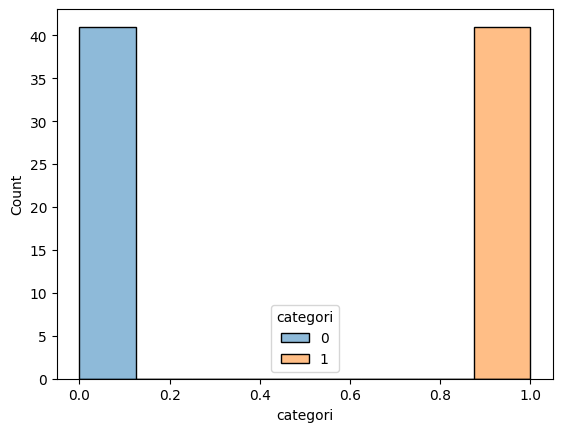

In [79]:
sns.histplot(train_set_rus, x = params['label'], hue = params['label'])

In [80]:
train_set_rus[params['label']].value_counts()

0    41
1    41
Name: categori, dtype: int64

Oversampling

In [81]:
ros = RandomOverSampler(random_state = 123)

In [82]:
X_ros, y_ros = ros.fit_resample(train_set.drop(params['label'], axis = 1), train_set[params['label']])

In [83]:
train_set_ros = pd.concat([X_ros, y_ros], axis = 1)

<AxesSubplot:xlabel='categori', ylabel='Count'>

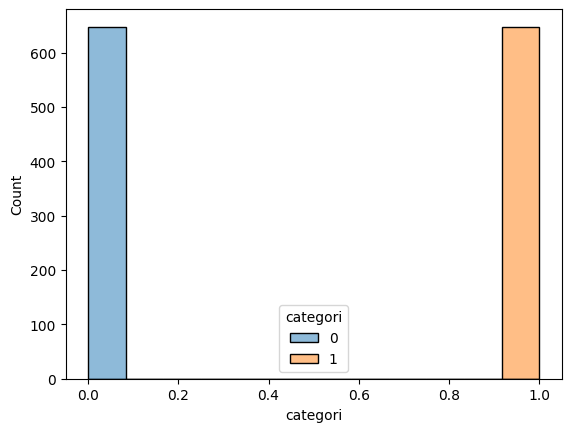

In [84]:
sns.histplot(train_set_ros, x = params['label'], hue = params['label'])

In [85]:
train_set_ros[params['label']].value_counts()

0    648
1    648
Name: categori, dtype: int64

SMOTE

In [86]:
sm = SMOTE(random_state = 123)

In [87]:
X_sm, y_sm = sm.fit_resample(train_set.drop(params['label'], axis = 1), train_set[params['label']])

In [88]:
train_set_sm = pd.concat([X_sm, y_sm], axis = 1)

<AxesSubplot:xlabel='categori', ylabel='Count'>

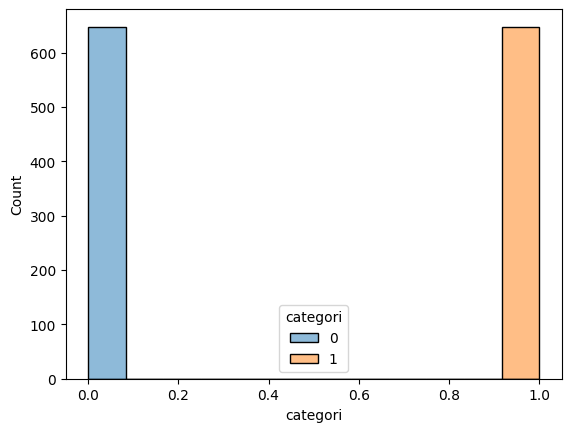

In [89]:
sns.histplot(train_set_sm, x = params['label'], hue = params['label'])

In [90]:
train_set_sm[params['label']].value_counts()

0    648
1    648
Name: categori, dtype: int64

# Feature Selection

In [91]:
# Input-Output split function
def input_output_split(df, column):
    
    """
    This function is created to split input and output column
    :param df: <pandas dataframe> data contain sample
    :param columns: <string> column name
    :return X: <pandas dataframe> data contain input
    :return y: <pandas dataframe> data contain output
    """
    
    X = df.drop(column, axis = 1)
    y = df[column]
    
    return X,y

Kendall's rank

In [92]:
# Input output split
X_train_set, y_train_set = input_output_split(df = train_set, column = params['label'])

In [93]:
# cat num split
X_train_cat, X_train_num, X_train_OHE = num_cat_split(X_train_set, params['range_stasiun'])

In [94]:
# Create Kendall's rank coefficient and p-value calculation function
def kendall_rank(input, output):
    
    """
    This function is created to calculate the level of significance between numeric type input data and object type output data 
    using kendall's rank
    
    :param input: <pandas dataframe> data contain input
    :param output: <pandas dataframe> data contain output  
    :return kendall_rank: <dictionary> collection of coefficient and p_value
    """
    
    # Create an empty dictionary to store the results
    kendall_rank = {}
    
    # Loop over each column in the numerical data DataFrame
    for col in input.columns:
        
        # Calculate Kendall's rank correlation coefficient    
        coefficient, p_value = kendalltau(input[col], output)
        
        # Store the results in the dictionary
        kendall_rank[col] = (coefficient, p_value)
    
    return kendall_rank

In [95]:
# Show Kendall's rank coefficient and p-value
kendall_rank(input = X_train_num, output = y_train_set)

{'pm10': (-0.32534019336378767, 5.714175574392051e-25),
 'pm25': (-0.32781799967805947, 1.3675662452688476e-25),
 'so2': (-0.14375662949466622, 5.565420724704569e-06),
 'co': (-0.24077415273630728, 8.341768138014866e-14),
 'o3': (-0.10664815573269286, 0.0007290076140834427),
 'no2': (-0.26351799849686386, 8.568258551507013e-17)}

Chi square test

In [96]:
# Create contingency table and chi-square calculation function
def chi_square_test(input, output):
    
    """
    This function is created to calculate the level of significance between object type input data and object type 
    output data using chi-squared test
    
    :param input: <pandas dataframe> data contain input
    :param output: <pandas dataframe> data contain output
    :return contingency_tables: <dictionary> collection of distribution of a set of categorical variables
    :return p_values_chi2: <dictionary> collection of p-value
    """
    
    # Create an empty dictionary to store the contingency tables
    contingency_tables = {}
    
    # Loop over each column in the boolean or categorical DataFrame
    for col in input.columns:
        
        # Create the contingency table
        contingency_table = pd.crosstab(output, input[col])
        
        # Store the contingency table in the dictionary
        contingency_tables[col] = contingency_table
        
    # Print the contingency tables
    for col, contingency_table in contingency_tables.items():
        print(f"{col}:")
        print(contingency_table)

    print("----------")    
        
    # Create an empty dictionary to store the p-values
    p_values_chi2 = {}
    
    # Loop over each contingency table
    for col, contingency_table in contingency_tables.items():
        
        # Calculate the chi-squared test statistic and p-value
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # Store the p-value in the dictionary
        p_values_chi2[col] = p
        
    # Print the p-values
    for col, p in p_values_chi2.items():
        print(f"{col}: {p:.7f}")

In [97]:
# Show contingency table and p_value
chi_square_test(input = X_train_cat, output = y_train_set)

DKI1 (Bunderan HI):
DKI1 (Bunderan HI)    0    1
categori                    
0                   521  127
1                    29   12
DKI2 (Kelapa Gading):
DKI2 (Kelapa Gading)    0    1
categori                      
0                     520  128
1                      33    8
DKI3 (Jagakarsa):
DKI3 (Jagakarsa)    0    1
categori                  
0                 519  129
1                  33    8
DKI4 (Lubang Buaya):
DKI4 (Lubang Buaya)    0    1
categori                     
0                    517  131
1                     38    3
DKI5 (Kebon Jeruk) Jakarta Barat:
DKI5 (Kebon Jeruk) Jakarta Barat    0    1
categori                                  
0                                 515  133
1                                  31   10
----------
DKI1 (Bunderan HI): 0.1951103
DKI2 (Kelapa Gading): 1.0000000
DKI3 (Jagakarsa): 1.0000000
DKI4 (Lubang Buaya): 0.0687188
DKI5 (Kebon Jeruk) Jakarta Barat: 0.6940681


In [98]:
# Probability of each station
for col in params['range_stasiun']:
    prob = X_train_set[col].sum() / len(X_train_set)
    print(f"{col} = {prob}")

DKI1 (Bunderan HI) = 0.20174165457184326
DKI2 (Kelapa Gading) = 0.19738751814223512
DKI3 (Jagakarsa) = 0.1988388969521045
DKI4 (Lubang Buaya) = 0.19448476052249636
DKI5 (Kebon Jeruk) Jakarta Barat = 0.20754716981132076


There is no correlation between station and categori (with evidence of probability and p-value). Therefore, this study will try to find correlation on the subset (per station)

In [99]:
# Split to subset
train_set_1 = train_set[train_set[params['range_stasiun'][0]] != 0]
train_set_2 = train_set[train_set[params['range_stasiun'][1]] != 0]
train_set_3 = train_set[train_set[params['range_stasiun'][2]] != 0]
train_set_4 = train_set[train_set[params['range_stasiun'][3]] != 0]
train_set_5 = train_set[train_set[params['range_stasiun'][4]] != 0]

In [100]:
# Sanity check
print(train_set_1.shape, train_set_2.shape, train_set_3.shape, train_set_4.shape, train_set_5.shape)

(139, 12) (136, 12) (137, 12) (134, 12) (143, 12)


In [101]:
# Input output split
X_train_set_1, y_train_set_1 = input_output_split(df = train_set_1, column = params['label'])
X_train_set_2, y_train_set_2 = input_output_split(df = train_set_2, column = params['label'])
X_train_set_3, y_train_set_3 = input_output_split(df = train_set_3, column = params['label'])
X_train_set_4, y_train_set_4 = input_output_split(df = train_set_4, column = params['label'])
X_train_set_5, y_train_set_5 = input_output_split(df = train_set_5, column = params['label'])

In [102]:
# cat num split
X_train_cat_1, X_train_num_1, X_train_OHE_1 = num_cat_split(X_train_set_1, params['range_stasiun'])
X_train_cat_2, X_train_num_2, X_train_OHE_2 = num_cat_split(X_train_set_2, params['range_stasiun'])
X_train_cat_3, X_train_num_3, X_train_OHE_3 = num_cat_split(X_train_set_3, params['range_stasiun'])
X_train_cat_4, X_train_num_4, X_train_OHE_4 = num_cat_split(X_train_set_4, params['range_stasiun'])
X_train_cat_5, X_train_num_5, X_train_OHE_5 = num_cat_split(X_train_set_5, params['range_stasiun'])

In [103]:
# Show Kendall's rank coefficient and p-value
kendall_rank(input = X_train_num_1, output = y_train_set_1)

{'pm10': (-0.4025057527312432, 1.3002197561783117e-08),
 'pm25': (-0.40083966897087514, 1.2129257028866782e-08),
 'so2': (0.10469919307942581, 0.1453854447425431),
 'co': (-0.3094470816151512, 1.755552011834772e-05),
 'o3': (-0.265294519889513, 0.00019712116809485832),
 'no2': (-0.37700746685530484, 9.508454637837417e-08)}

In [104]:
# Show Kendall's rank coefficient and p-value
kendall_rank(input = X_train_num_2, output = y_train_set_2)

{'pm10': (-0.3212402195099181, 6.458723143889684e-06),
 'pm25': (-0.3364880934940289, 2.1729497610044198e-06),
 'so2': (-0.30421495934829273, 2.496959623032551e-05),
 'co': (-0.2727334252797733, 0.00022290435958134875),
 'o3': (-0.1482900700849267, 0.03774318261969487),
 'no2': (-0.20138117626901295, 0.005088077476989224)}

In [105]:
# Show Kendall's rank coefficient and p-value
kendall_rank(input = X_train_num_3, output = y_train_set_3)

{'pm10': (-0.2869428654296746, 5.416001047233396e-05),
 'pm25': (-0.294452461171451, 3.1302725637842985e-05),
 'so2': (-0.1749345475721581, 0.01616733988847593),
 'co': (-0.1682166247309214, 0.02052117021748047),
 'o3': (0.03299443917669568, 0.6456971746338108),
 'no2': (-0.20054345380946098, 0.0058436639989615175)}

In [106]:
# Show Kendall's rank coefficient and p-value
kendall_rank(input = X_train_num_4, output = y_train_set_4)

{'pm10': (-0.2117975088285261, 0.0032546371436074795),
 'pm25': (-0.21135099481614691, 0.0031175108672005193),
 'so2': (-0.0626387336094909, 0.3972691706657486),
 'co': (-0.16063619136436086, 0.0291070903749937),
 'o3': (-0.06416305904564472, 0.3743941784244115),
 'no2': (-0.17680943473850583, 0.015506375768125373)}

In [107]:
# Show Kendall's rank coefficient and p-value
kendall_rank(input = X_train_num_5, output = y_train_set_5)

{'pm10': (-0.36436159911828625, 1.6757495203252932e-07),
 'pm25': (-0.3644002468935802, 1.4009480808586985e-07),
 'so2': (-0.19033272928838949, 0.00862065141007356),
 'co': (-0.36432627389986605, 2.6197803145280886e-07),
 'o3': (-0.2532133354513332, 0.0002975798018591553),
 'no2': (-0.31175832058160613, 7.373415860365638e-06)}

The predictor variable in each station mostly have significant correlation when being compared to categori column. Therefore, no feature will be removed.

In [108]:
joblib.dump(X_train_set, "processed/X_train_feng.pkl")
joblib.dump(y_train_set, "processed/y_train_feng.pkl")

joblib.dump(X_rus, "processed/X_rus.pkl")
joblib.dump(y_rus, "processed/y_rus.pkl")

joblib.dump(X_ros, "processed/X_ros.pkl")
joblib.dump(y_ros, "processed/y_ros.pkl")

joblib.dump(X_sm, "processed/X_sm.pkl")
joblib.dump(y_sm, "processed/y_sm.pkl")

joblib.dump(validation_set.drop(columns = "categori"), "processed/X_valid_feng.pkl")
joblib.dump(validation_set.categori, "processed/y_valid_feng.pkl")

joblib.dump(testing_set.drop(columns = "categori"), "processed/X_test_feng.pkl")
joblib.dump(testing_set.categori, "processed/y_test_feng.pkl")

['processed/y_test_feng.pkl']